Морфологический анализ <br/>
Домашнее задание 9 <br/>
**Голев Александр 135М**

## 1. Построить по незашумленным изображениям цифр i = 0, 1, . . . , 9  
абсолютные формы их изображений Li как **формы изображений с двумя областями постоянной яркости**;

## 2. Вычислить **индексы морфологической независимости** от σ 
для относительных форм Li ⊖ Li,j и Lj ⊖ Li,j и **индексы морфологической связности** для абсолютных
форм Li и Lj, где Li,j = Li ∩ Lj, j ̸= i, i, j ∈ {0, 1, . . . , 9}.

## 3. Построить график зависимости от σ:
- коэффициента ранговой корреляции Кендалла
- коэффициента ранговой корреляции Спирмена
- значений индекса морфологической независимости
- частоты неверной классификации

σ меняем от первых ошибки классификации 8 задания, до того, при котором общая частота неверной идентификации ≃ 0.2.

Делаем это все, чтобы проверить, что большие значения индекса морфологической независимости соответствуют меньшим вероятностям неверной классификации

# Решение

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from itertools import product

import func as f
import mosaic_approx as ma
import noise_gen as ns
import last_finder as find
import old_finder as old_find

По результатам задания 8 значение σ возьму от 100 до 180

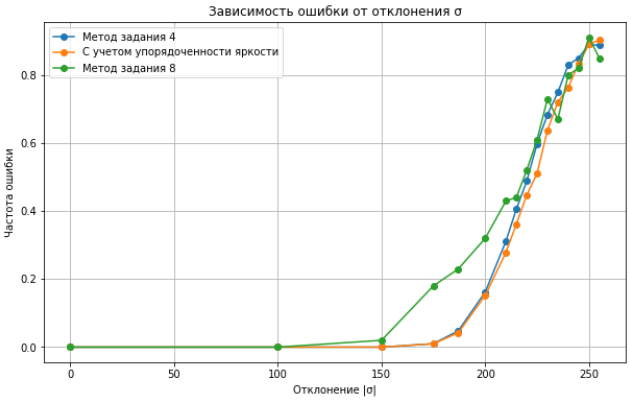

In [2]:
sigmas = np.linspace(100,180,16)

In [3]:
# Загружаем изображение
samples = []
samples_bin = []
for number in range(10):
    image = cv2.imread(f'samples/c_{number}.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    samples.append(gray_image)
    _, image_bin = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    samples_bin.append(image_bin)

In [4]:
# Cтроим формы
sample_fs, sample_msks, sample_lvls = [],[],[]
for number in range(10):
    fr, m, l  = ma.relaxation(samples_bin[number], threshold=0, N=1)
    sample_fs.append(fr[0])
    sample_msks.append(m)
    sample_lvls.append(l)

Определим **индексы морфологической независимости и связности**

In [5]:
#Difficult variant
'''
def get_diff_mask(masks1,masks2, reversed = False):
    diffs = []
    for m1,m2 in zip(masks1,masks2):
        if not reversed: diffs.append(m1 - m1 * m2 )
        else: diffs.append(m2 - m1 * m2 )
    return diffs

def build_Bmatrix(masks1, masks2,shape):
    B = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
           m1 = masks1[i]
           m2 =  masks2[j]
           B[i,j] = np.sum(m1 * m2)/784
    return B

def build_Mmatrix(masks1, masks2):
    l,m = len(masks1),len(masks2)
    #s = l + m
    B = build_Bmatrix(masks1, masks2,(l,m))
    i1, i2 = np.diag([1]*l), np.diag([1]*m)
    M =  np.hstack((i1,B))
    M = np.vstack((M,np.hstack((B.T,i2))))
    return M, B

def projection(g,masks):
    p = g.copy()*0
    colors = []
    for mask in masks:
        colors.append(np.ma.array(g,mask=1-mask).mean())
    for color, mask in zip(colors,masks):
        p[(mask==1)] = color
        
    return p

def gram_matrix(vectors):
    return np.dot(vectors, vectors.T)

def get_independence(masks1, masks2):
    l,m = len(masks1),len(masks2)
    
    vectors = []
    # Строим проектор для П(2,0)
    diffs = get_diff_mask(masks1, masks2,reversed=True)
    # Проецируем на e_1
    for i in range(l):
        vectors.append(projection(masks1[i], diffs))
    vectors = np.array(vectors)
    # Строим матрицу грамма
    gram_m = gram_matrix(vectors)
    print(gram_m)
    
    return np.linalg.det(np.ones(gram_m.shape) - gram_m)
'''


'\ndef get_diff_mask(masks1,masks2, reversed = False):\n    diffs = []\n    for m1,m2 in zip(masks1,masks2):\n        if not reversed: diffs.append(m1 - m1 * m2 )\n        else: diffs.append(m2 - m1 * m2 )\n    return diffs\n\ndef build_Bmatrix(masks1, masks2,shape):\n    B = np.zeros(shape)\n    for i in range(shape[0]):\n        for j in range(shape[1]):\n           m1 = masks1[i]\n           m2 =  masks2[j]\n           B[i,j] = np.sum(m1 * m2)/784\n    return B\n\ndef build_Mmatrix(masks1, masks2):\n    l,m = len(masks1),len(masks2)\n    #s = l + m\n    B = build_Bmatrix(masks1, masks2,(l,m))\n    i1, i2 = np.diag([1]*l), np.diag([1]*m)\n    M =  np.hstack((i1,B))\n    M = np.vstack((M,np.hstack((B.T,i2))))\n    return M, B\n\ndef projection(g,masks):\n    p = g.copy()*0\n    colors = []\n    for mask in masks:\n        colors.append(np.ma.array(g,mask=1-mask).mean())\n    for color, mask in zip(colors,masks):\n        p[(mask==1)] = color\n        \n    return p\n\ndef gram_matrix(

In [6]:
# Нахождение индекса морфологической независимости
def get_simple_independence(mask1,mask2):
    #np.dot(a,b) = np.sum(a* b) но выдает неверный ответ при работе с np.uint8 
    #norm1 = 
    cos_angle = np.sum(mask1* mask2) / np.linalg.norm(mask1) / np.linalg.norm(mask2)
    return np.sqrt(1 - cos_angle**2) 

In [7]:
def get_indenpendence(masks1, masks2):
    e1, e2 = masks1[1].astype('float'), masks1[0].astype('float')
    f1, f2 = masks2[1].astype('float'), masks2[0].astype('float')
  
    c1 = -1*np.linalg.norm(e1)**2/np.linalg.norm(e2)**2
    c2 = -1*np.linalg.norm(f1)**2/np.linalg.norm(f2)**2
    
    # коэфициенты, такие, чтобы g1 и g2 были в разных картинках, но были ортогональны всей области потсоянной яркости
    g1 = e1+c1*e2   
    g2 = f1+c2*f2

    g1 = g1/np.linalg.norm(g1)
    g2 = g2/np.linalg.norm(g2)

    return 1 - np.sum(g1*g2)

In [8]:
def get_inters_masks(masks1,masks2):
    diffs = []
    for m1,m2 in zip(masks1,masks2):
        diffs.append(m1 * m2)
    return diffs

# Нахождение индекса морфологической связности
def  get_coherence(masks1,masks2):
     inters_masks = get_inters_masks(masks1,masks2)
     l,m, k = len(masks1),len(masks2), 0
     for mask in inters_masks:
          if np.sum(mask)>0: k+=1
     return k/min([k+l,k+m])

In [9]:
simple_independence_map = {}
independence_map = {}
coherence_map = {}

print("Пара:\t Независимость 1:\t\t Независимость 2:\t\t Связность:\n")

for comb, nums in zip(product(sample_msks, repeat = 2), product(range(10),repeat = 2)):
    key = "-".join([str(x) for x in nums])
    value_1 = get_simple_independence(comb[0][1],comb[1][1])
    value_2 = get_indenpendence(comb[0],comb[1])
    value_3 = get_coherence(comb[0],comb[1])
    simple_independence_map[key] =  value_1
    independence_map[key] = value_2
    coherence_map[key] = value_3
    print(key,"\t", value_1,"\t", value_2, "\t", value_3)

Пара:	 Независимость 1:		 Независимость 2:		 Связность:

0-0 	 nan 	 -4.440892098500626e-16 	 0.5
0-1 	 0.9444185824267403 	 0.7412408644511121 	 0.5
0-2 	 0.8384195367259186 	 0.559592021021952 	 0.5
0-3 	 0.8988624127697896 	 0.685452639869546 	 0.5
0-4 	 0.9311969910779268 	 0.7669595917683201 	 0.5
0-5 	 0.9319138577168279 	 0.7237885370447048 	 0.5
0-6 	 0.9100533741366577 	 0.6640572558186466 	 0.5
0-7 	 0.9433123181091206 	 0.7703314259953086 	 0.5
0-8 	 0.7911379655758783 	 0.46334296684107323 	 0.5
0-9 	 0.9093176085337006 	 0.656255607260287 	 0.5
1-0 	 0.9444185824267403 	 0.7412408644511121 	 0.5
1-1 	 1.4901161193847656e-08 	 1.1102230246251565e-15 	 0.5
1-2 	 0.9613312156032331 	 0.8058141136521618 	 0.5
1-3 	 0.9464031975567703 	 0.7488460285419035 	 0.5
1-4 	 0.9914161502144208 	 0.9625748068835328 	 0.5
1-5 	 0.9566039988488437 	 0.7615914251259484 	 0.5
1-6 	 0.9758272418672013 	 0.8400518397345145 	 0.5
1-7 	 0.9723968097209881 	 0.8295640879864795 	 0.5
1-8 	 0.9166

C:\Users\golev\AppData\Local\Temp\ipykernel_27816\420077418.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - cos_angle**2)


### Коэффициент корреляции кендалла

In [10]:
from scipy.stats import kendalltau

In [11]:
def get_Kendall(errors_map):
    x,y  = [], []
    for nums in product(range(10),repeat = 2):
        key = f"{nums[0]}-{nums[1]}"
        if (nums[0]!=nums[1]):        
            x.append(errors_map[key]/100)
            y.append(independence_map[key])
    return kendalltau(x,y)

In [12]:
'''length = 100

def get_error(sigma):
    errors_map = {}
    print('.',end='')
    #по каждой цифре
    for digit, dig_img in enumerate(samples):
        # выборка 100 для каждой цифры
        for tmp_img in ns.genNoises(dig_img, sigma, length = length):
            # если ошиблись, считаем ошибку
            result = findDigit(tmp_img, *args)[0]
            str = f"{digit}-{result}"        
            if digit != result:
                if str in errors_map.keys:
                    errors_map[str]+=1
                else:
                    errors_map[str]=1
                
    errors.append(error)'''

'length = 100\n\ndef get_error(sigma):\n    errors_map = {}\n    print(\'.\',end=\'\')\n    #по каждой цифре\n    for digit, dig_img in enumerate(samples):\n        # выборка 100 для каждой цифры\n        for tmp_img in ns.genNoises(dig_img, sigma, length = length):\n            # если ошиблись, считаем ошибку\n            result = findDigit(tmp_img, *args)[0]\n            str = f"{digit}-{result}"        \n            if digit != result:\n                if str in errors_map.keys:\n                    errors_map[str]+=1\n                else:\n                    errors_map[str]=1\n                \n    errors.append(error)'

**Проходимся по всем sigma**

In [13]:
find.init(samples)

................

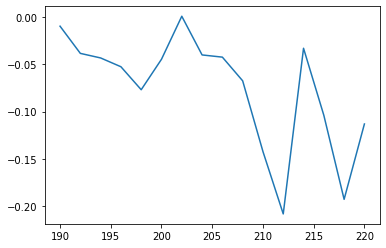

In [17]:
Kendal_corrs = []
Spear_corrs = []
#errors_map = {}
corr_values = []

sigmas = np.linspace(190,220,16)
for sigma in sigmas:
    #TODO Тут нахождение ошибок для каждой пары при определении цифр с шумом sigma 
    errors = old_find.get_error(sigma, samples_bin)
    print('.',end='')
    
    Kendal_corr = get_Kendall(errors)
    #print(Kendal_corr)
    #Spear_corr = get_Spear(sigma)

    corr_values.append(Kendal_corr[0])
    #corr_values.append(Spear_corr)

plt.plot(sigmas,corr_values)

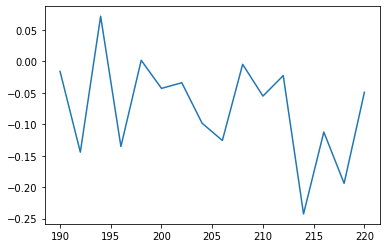

In [15]:
plt.plot(sigmas,corr_values)

# Кендалл
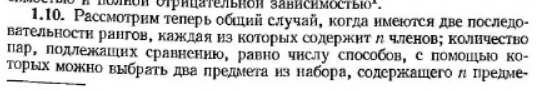

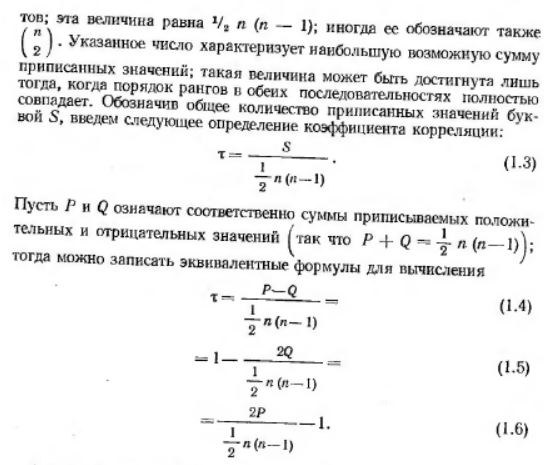

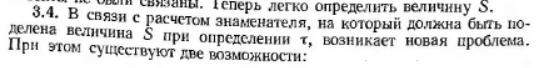

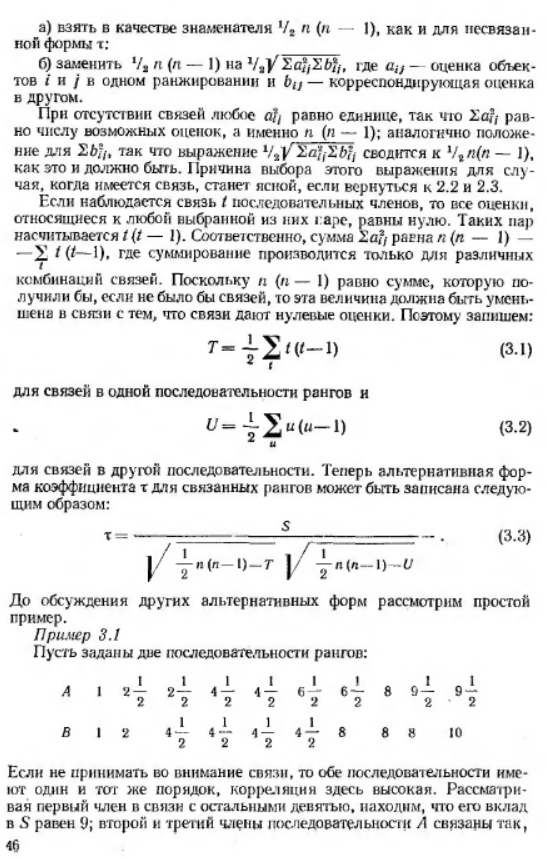

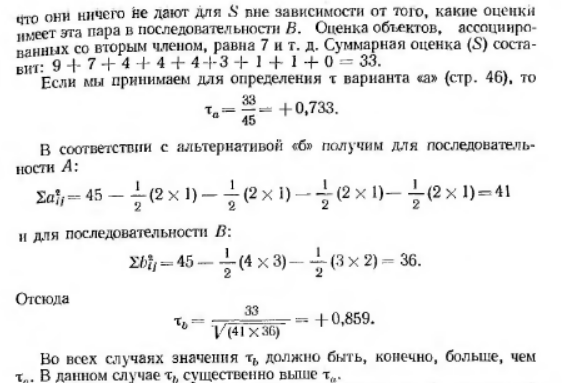